In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# approximations de π/4 avec nombre d'iteration

In [7]:
def approximation_pi_sur_4_nb_iterat(nb:int):
    """ nb:nombre d'iteration
    """
    s=0
    for i in range(nb):
        s=s+(2/((4*i+1)*(4*i+3)))
    return s

In [8]:
approximation_pi_sur_4_nb_iterat(100000)

0.7853969133974545

In [9]:
#Je calcule les erreurs des nombres d'iterations
nbIterations=[i for i in range(1000,10000,1000)]
Errer=[(np.pi/4)-approximation_pi_sur_4_nb_iterat(i) for i in nbIterations]

Text(0, 0.5, 'Difference entre la valeur de numpy et la valeur calcule')

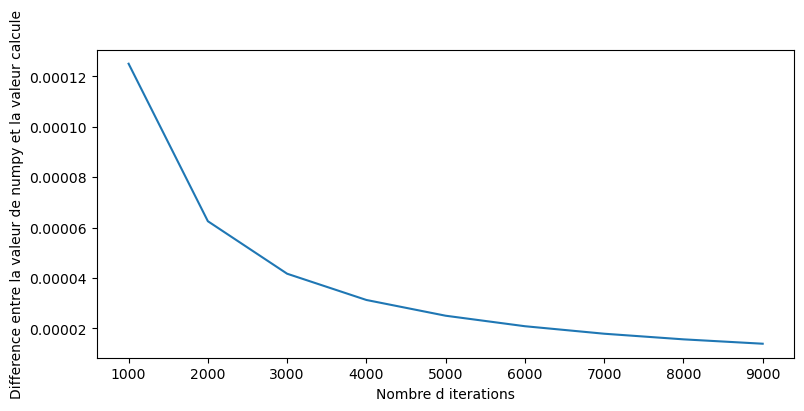

In [10]:
plt.figure(figsize=(9,4))
plt.plot(nbIterations,Errer)
plt.xlabel('Nombre d iterations')
plt.ylabel('Difference entre la valeur de numpy et la valeur calcule')

# On voit que plus le nombre d'iteration augmente plus l'erreur dimunie

# approximations de π/4 avec precision

In [11]:
def approximation_pi_sur_4_avec_precison(p):
    """ p:precision
    """
    s=0
    r=2/3
    i=0
    while r>p:
        i=i+1
        s=s+r
        r=(2/((4*i+1)*(4*i+3)))
    return s,i

In [12]:
approximation_pi_sur_4_avec_precison(10**(-11))[0]

0.7853970453594804

In [13]:
np.pi/4

0.7853981633974483

In [14]:
def approximat_pi_sur_4_amelior(p):
    l=[(-1)**i/(2*i+1) for i in range(int((1-p)/(2*p))+1)]
    return sum(l),len(l)

In [16]:
approximat_pi_sur_4_amelior(10**(-5))[0]

0.7853931633974454

In [15]:
precisions=[10**-i for i in range(1,15)]
nbIteration=[approximation_pi_sur_4_avec_precison(i)[1] for i in precisions]

Text(0, 0.5, 'La precision')

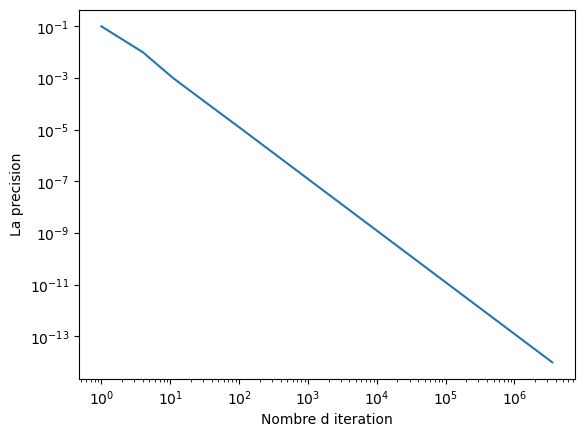

In [17]:
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(nbIteration,precisions)
plt.xlabel('Nombre d iteration')
plt.ylabel('La precision')

# Plus on augmente la precision(en diminuant p) plus le nombre d'iteration augmente

Text(0, 0.5, 'Errer')

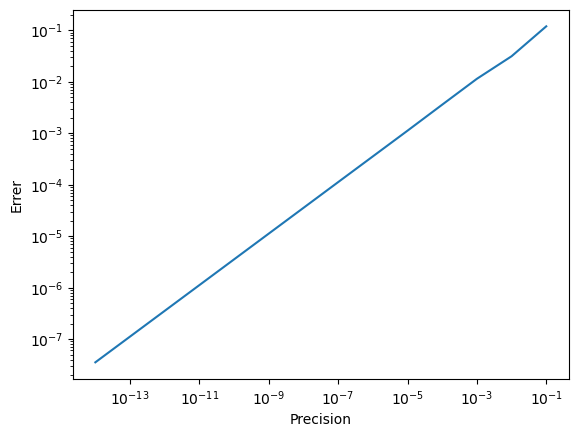

In [18]:
errer=[np.pi/4-approximation_pi_sur_4_avec_precison(i)[0] for i in precisions]
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(precisions,errer)
plt.xlabel('Precision')
plt.ylabel('Errer')

# Plus on augmente  la precision plus l'erreur dimunie

In [19]:
df=pd.DataFrame(columns=['precision','NbreIteration','Errer'])
for i in range(0,len(precisions)):
    val=approximation_pi_sur_4_avec_precison(precisions[i])
    errer=(np.pi/4)-val[0]
    df.loc[i]=[precisions[i],val[1],errer]
df

,precision,NbreIteration,Errer
0,1.000000e-01,1.0,1.187315e-01
1,1.000000e-02,4.0,3.113021e-02
2,1.000000e-03,11.0,1.135778e-02
3,1.000000e-04,35.0,3.571246e-03
4,1.000000e-05,112.0,1.116066e-03
5,1.000000e-06,354.0,3.531072e-04
6,1.000000e-07,1118.0,1.118068e-04
7,1.000000e-08,3536.0,3.535068e-05
8,1.000000e-09,11180.0,1.118068e-05
9,1.000000e-10,35355.0,3.535568e-06


In [20]:
df.corr()

,precision,NbreIteration,Errer
precision,1.000000,-0.123484,0.984692
NbreIteration,-0.123484,1.000000,-0.154385
Errer,0.984692,-0.154385,1.000000


# La matrice de correlation montre bien la compromis entre le temps d'execution(nbre d iteration) et la precision 

# approximations de π/2 

In [21]:
def approximation_pi_sur_2(nb:int):
    """ nb:nombre d'iteration
    """
    s=1
    for i in range(100):
        s=s+(8/((4*i+1)*(4*i+3)*(4*i+5)))
    return s

In [23]:
for i in range(1000,10000,1000):
    print(approximation_pi_sur_2(10000))

1.5707901080054432
1.5707901080054432
1.5707901080054432
1.5707901080054432
1.5707901080054432
1.5707901080054432
1.5707901080054432
1.5707901080054432
1.5707901080054432


In [24]:
np.pi/2

1.5707963267948966

In [25]:
def approximation_pi_sur_4_avec_precison(p):
    """ p:precision
    """
    s=1
    r=4/3
    i=1
    while r-1>p:
        i=i+1
        s=s*r
        r=(4*i**2)/(4*i**2-1)
    return s,i

In [26]:
approximation_pi_sur_4_avec_precison(10**-14)

(1.5707962478585158, 4974440)

Text(0.5, 1.0, 'pi/2')

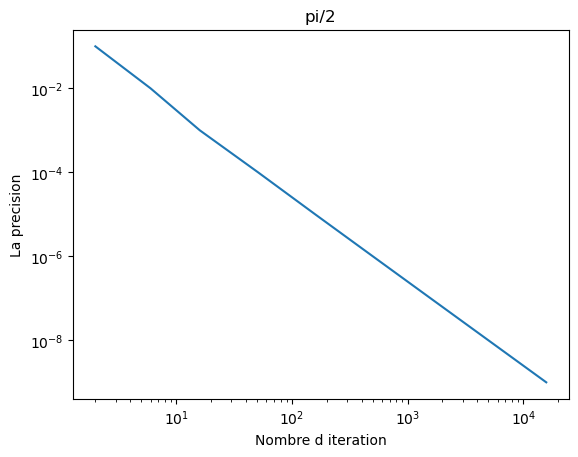

In [27]:
precisions_2=[10**-i for i in range(1,10)]
nbIteration_2=[approximation_pi_sur_4_avec_precison(i)[1] for i in precisions_2]
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(nbIteration_2,precisions_2)
plt.xlabel('Nombre d iteration')
plt.ylabel('La precision')
plt.title("pi/2")

## Plus la precision augmente plus le nombre d iteration augmente

# calcul itératif  du factoriel d'un entier

In [28]:
def factoriel_itera(n):
    return np.prod(range(1,n+1))

In [29]:
factoriel_itera(5)

120

# calcul recursif  du factoriel d'un entier

In [30]:
def factoriel_recur(n):
    return n*factoriel_recur(n-1) if n>1 else 1

In [31]:
factoriel_recur(5)

120

# calcul de ∑i=1/i dans le sens des i croissant et dans le sens des i décroissants.

In [32]:
s1,s2=(0,0)
for i in range(1,6001):
    s1=s1+1/i
    s2=s2+1/(6001-i)
s1,s2

(9.276813744130223, 9.27681374413024)

# calcul de cosx par développement limité

### calcul de cosx par développement limité sans récurrence

In [33]:
def calcul_cos_x(x,p):
    s=1
    i=0
    t=1
    while t>p:
        i=i+1
        for j in range(1,2*i+1):
            t=t*x/j
        if i%2==0:
            s=s+t
        else:
            s=s-t
    return s,i

In [64]:
calcul_cos_x(np.pi,10**-5)

(-4.518208169281756, 7)

In [69]:
np.cos(4)

-0.6536436208636119

### calcul de cosx par développement limité avec récurrence

In [67]:
def calcul_cos_x_recur(x,p):
    s=1
    i=0
    t=1
    while t>p:
        t=-t*x*x/(2*i+1)*(2*i+2)
        i=i+1
        s=s*t
    return s,i

In [71]:
calcul_cos_x_recur(4,10**-14)

(-32.0, 1)